In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
df=pd.read_csv('Global Terrorism Data.csv')
df.head()

C:\Users\Rakesh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [3]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day', 'country_txt':'Country','provstate':'state',
                         'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'}, inplace=True)

In [4]:
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Target','Killed','Wounded','Summary','Group','Target_type','Weapon_type','Motive']]

In [5]:
df['casulties']=df['Killed']+df['Wounded']

In [6]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Target            636
Killed          10313
Wounded         16311
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casulties       16874
dtype: int64

In [7]:
# Null values with percentage
df.isnull().sum()/len(df)*100

Year            0.000000
Month           0.000000
Day             0.000000
Country         0.000000
state           0.231712
Region          0.000000
city            0.238867
latitude        2.507554
longitude       2.508104
AttackType      0.000000
Target          0.350045
Killed          5.676120
Wounded         8.977330
Summary        36.396409
Group           0.000000
Target_type     0.000000
Weapon_type     0.000000
Motive         72.171984
casulties       9.287196
dtype: float64

In [8]:
df.shape

(181691, 19)

In [9]:
drop_na_values=[i for i in df.columns if df[i].isnull().sum()*100/len(df) > 70]

In [10]:
drop_na_values
df.drop(drop_na_values,inplace=True,axis=1)

In [11]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
state            421
Region             0
city             434
latitude        4556
longitude       4557
AttackType         0
Target           636
Killed         10313
Wounded        16311
Summary        66129
Group              0
Target_type        0
Weapon_type        0
casulties      16874
dtype: int64

In [12]:
df.duplicated().sum()

9504

In [13]:
df.drop_duplicates()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,casulties
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,Checkpoint,1.0,2.0,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,3.0
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,Hmeymim Air Base,2.0,7.0,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,9.0
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,Houses,0.0,0.0,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,0.0
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,Office,0.0,0.0,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,0.0


## Data Visualisation

### Lets See Which Year was the most peacefull and which was the most violent year and general trends of attacks through out the year

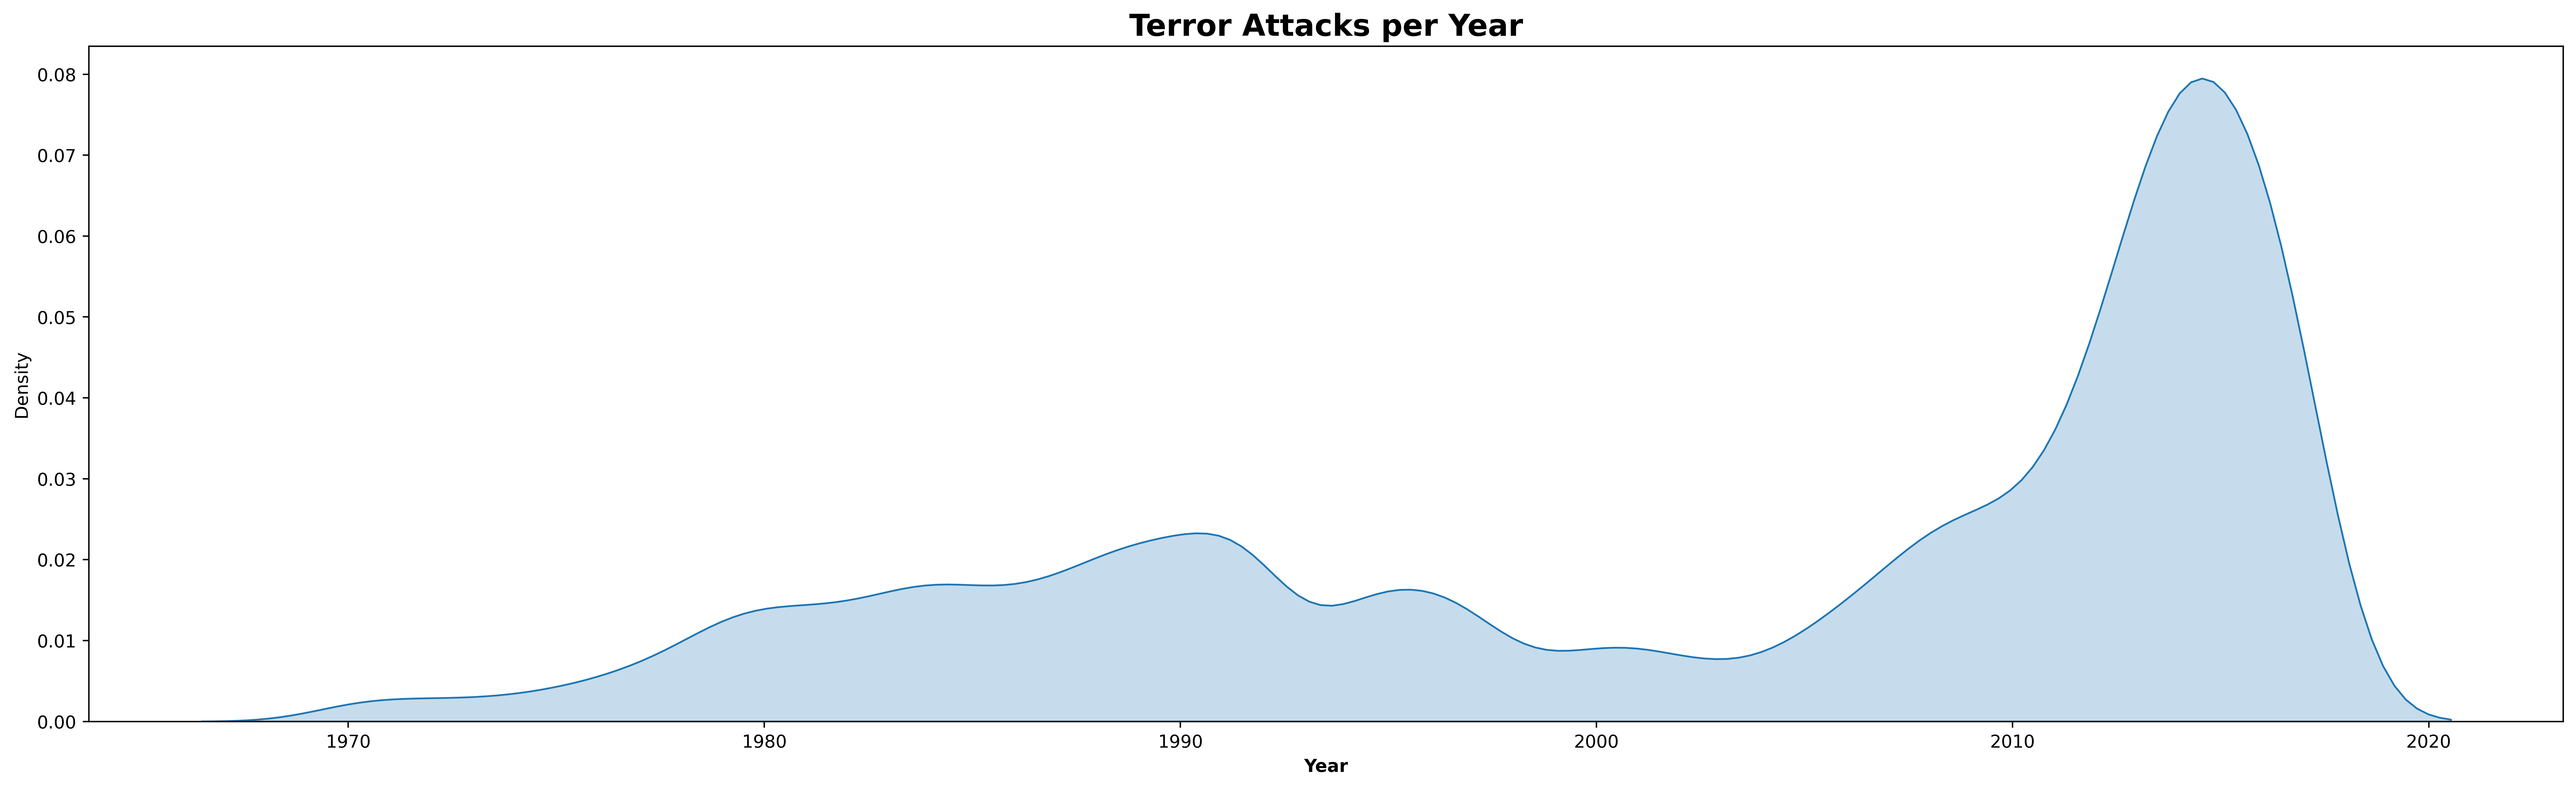

In [14]:
plt.figure(figsize=(25,7),dpi=500)
sns.kdeplot(x='Year',data=df,fill=True)
plt.xlabel('Year',fontweight='bold')
plt.title('Terror Attacks per Year', fontweight='bold',fontsize=17);

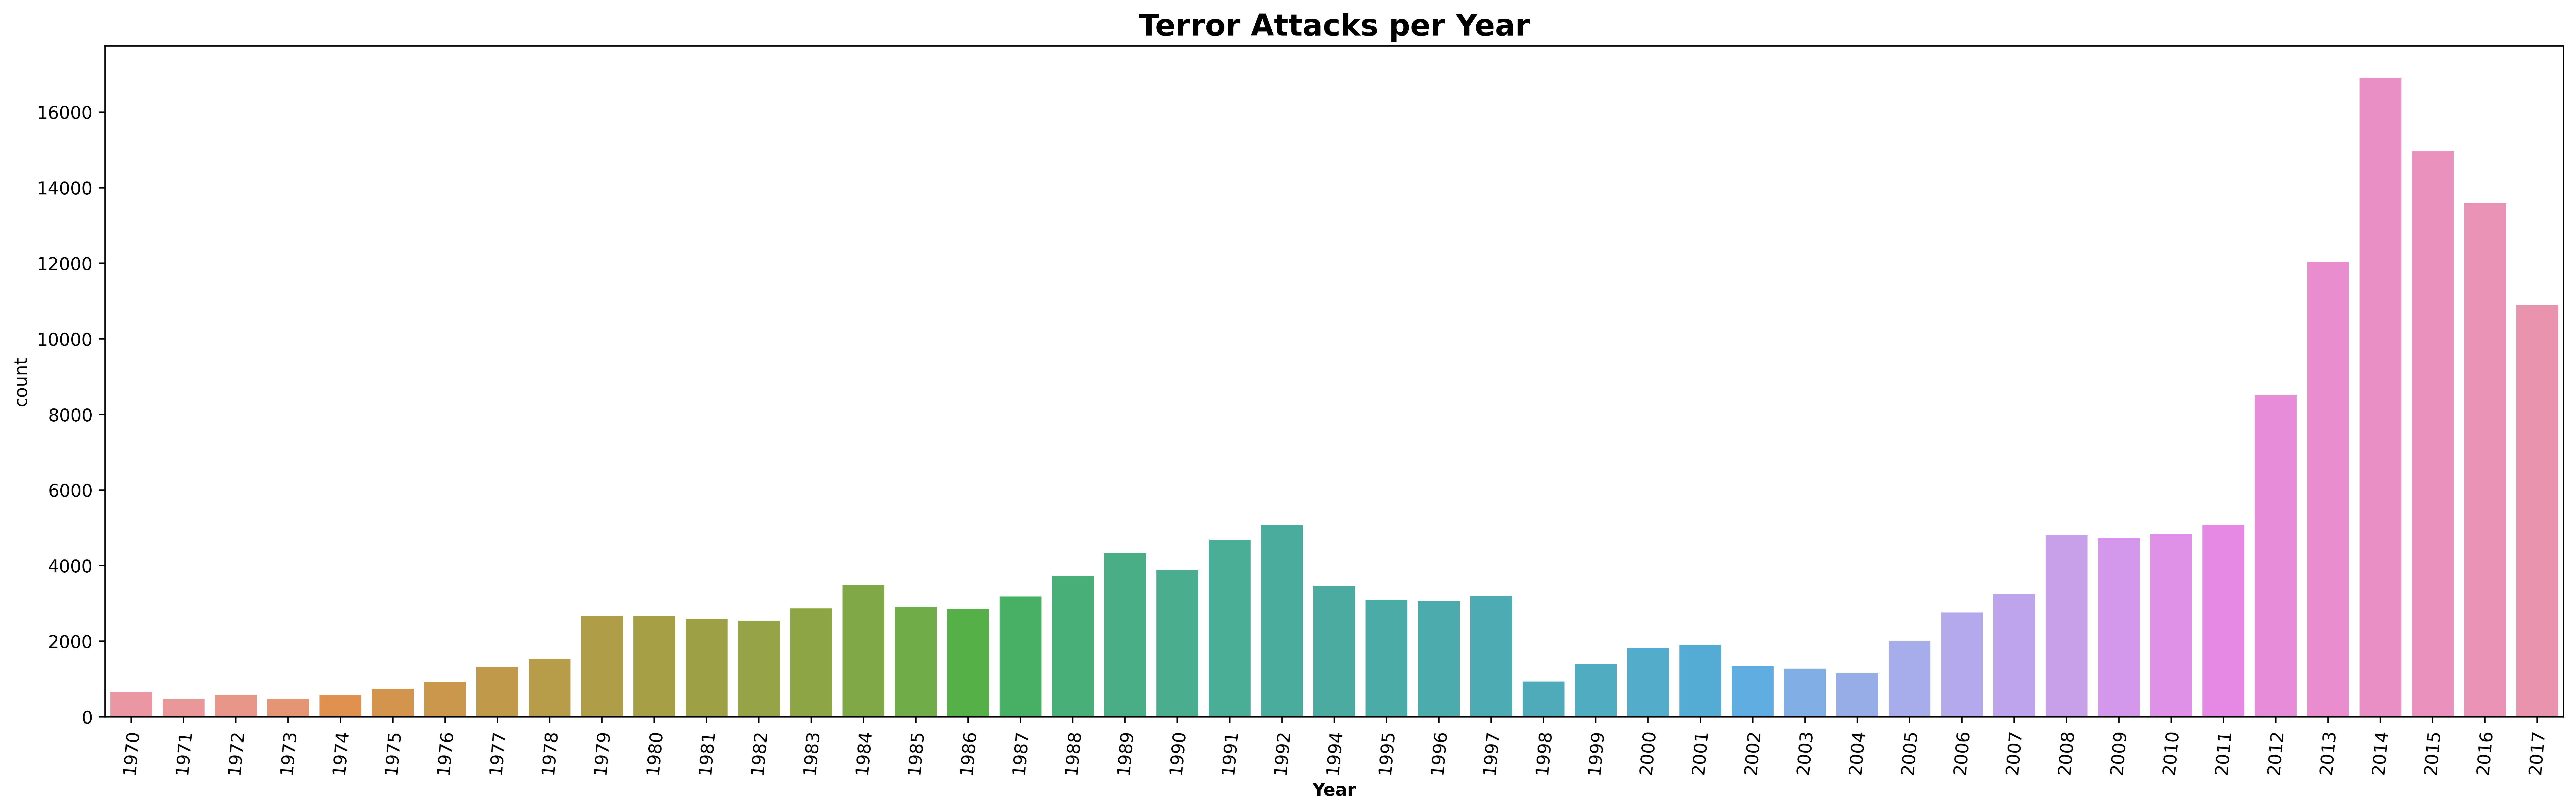

In [15]:
plt.figure(figsize=(25,7),dpi=500)
sns.countplot(x='Year',data=df,fill=True)
plt.xlabel('Year',fontweight='bold')
plt.title('Terror Attacks per Year', fontweight='bold',fontsize=17)
plt.xticks(rotation=85)
plt.show()

### Lets see top 10 countries affected most in terms of casualities and number of attacks

In [16]:
affected_countries=df[['casulties','Country']].groupby('casulties').sum().sort_values('casulties',ascending=False).head(10)
affected_countries =affected_countries.reset_index()
affected_countries

,casulties,Country
0,9574.0,United StatesUnited States
1,5513.0,Japan
2,4224.0,Kenya
3,1503.0,Iraq
4,1362.0,Sri Lanka
5,1180.0,Rwanda
6,1161.0,Chad
7,1071.0,Russia
8,1005.0,India
9,1000.0,IraqIraq


Text(0.5, 1.0, 'Top 10 countries with highest number of Casualties people')

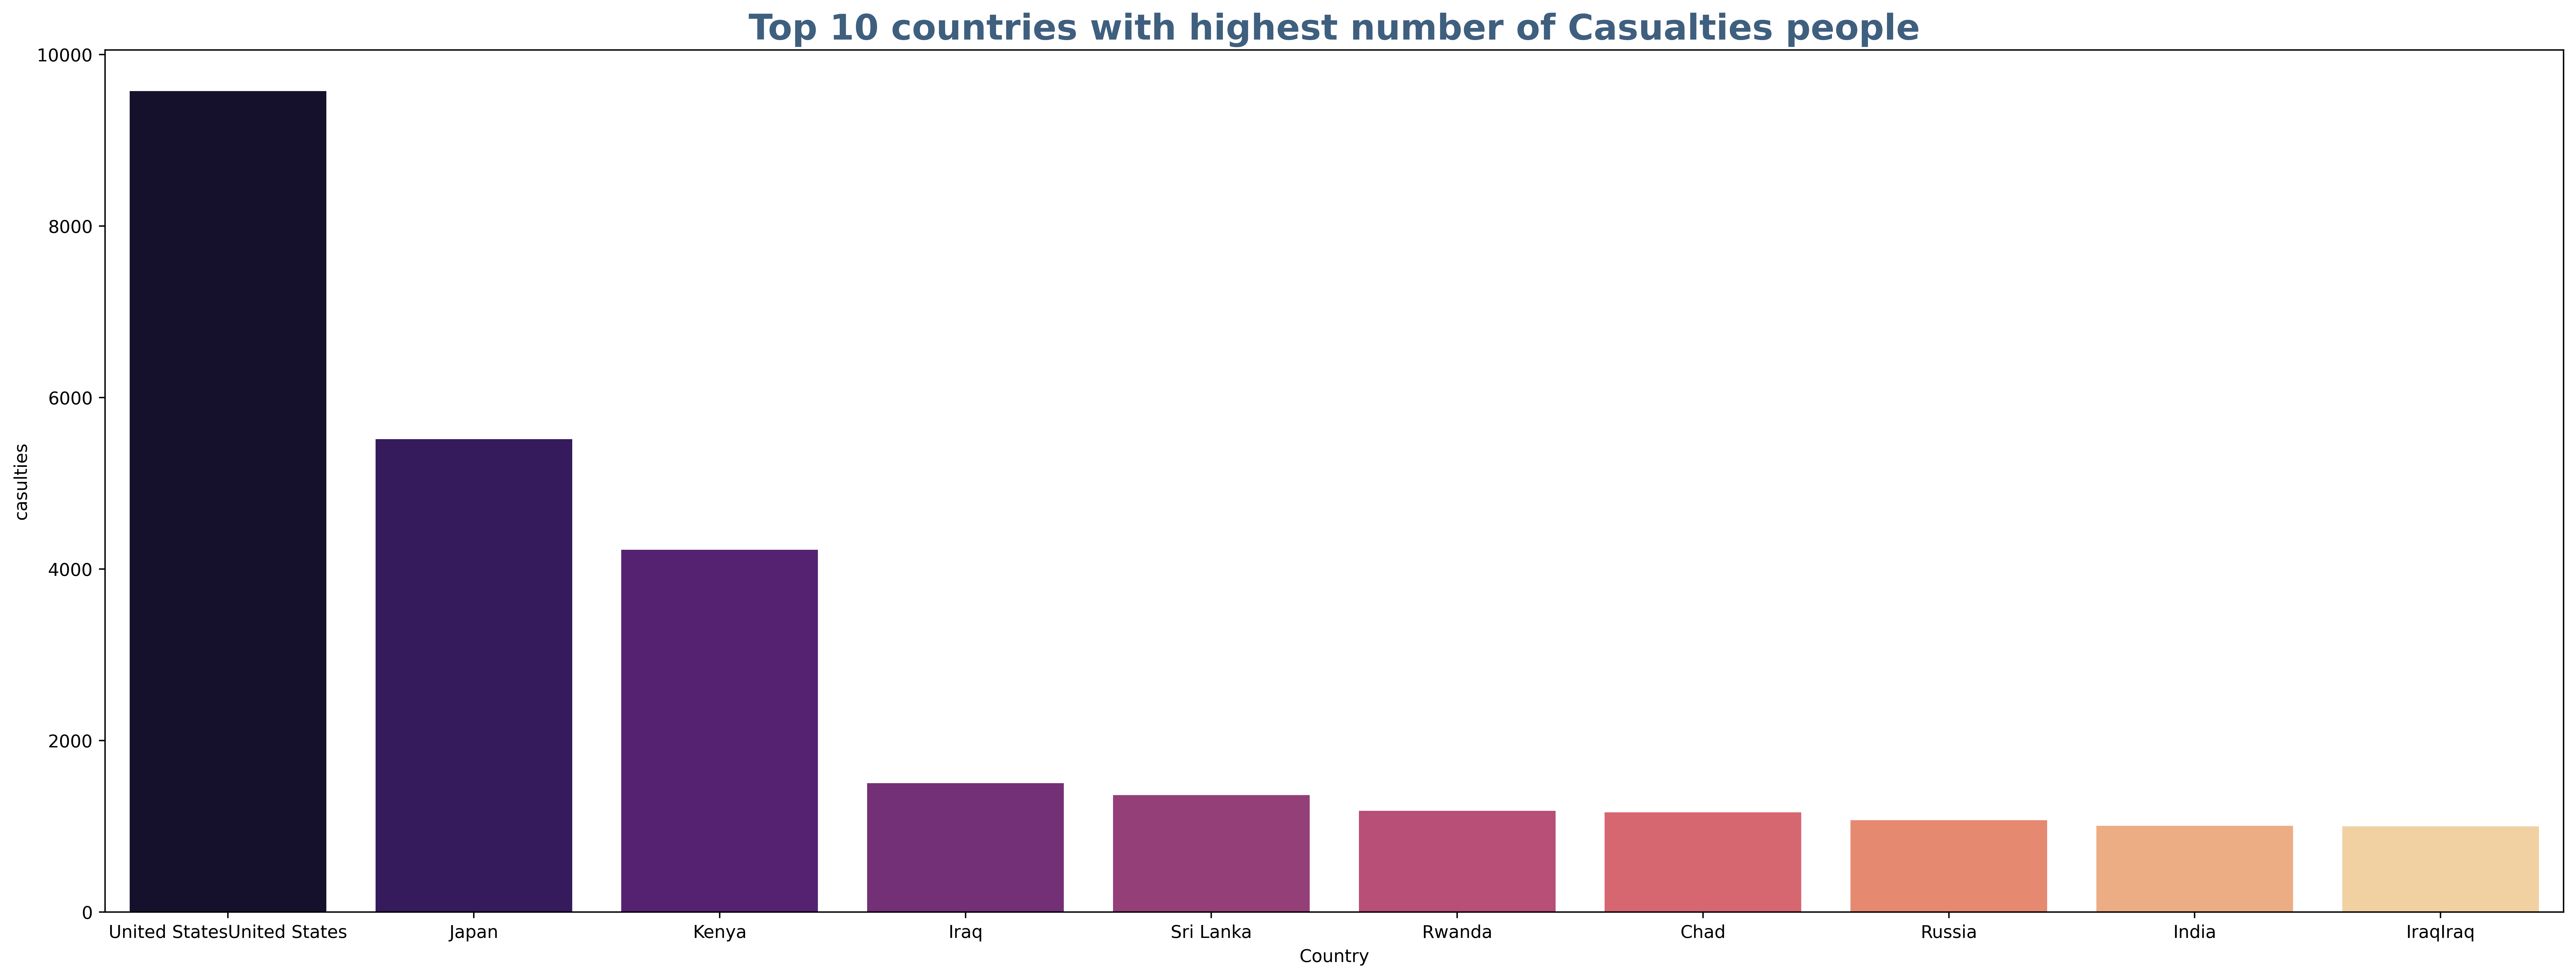

In [17]:
plt.figure(figsize=(25,9),dpi=500)
sns.barplot(x=affected_countries['Country'],y=affected_countries['casulties'],palette='magma')
plt.title("Top 10 countries with highest number of Casualties people",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])

In [18]:
most_killed=df[['Country','Killed']].groupby('Country',as_index=False).sum().sort_values(by='Killed',ascending=False).head(10)
most_killed

,Country,Killed
84,Iraq,78589.0
0,Afghanistan,39384.0
134,Pakistan,23822.0
130,Nigeria,22682.0
80,India,19341.0
167,Sri Lanka,15530.0
175,Syria,15229.0
35,Colombia,14698.0
139,Peru,12771.0
52,El Salvador,12053.0


Text(0.5, 1.0, 'Top 10 countries with highest number of killed people')

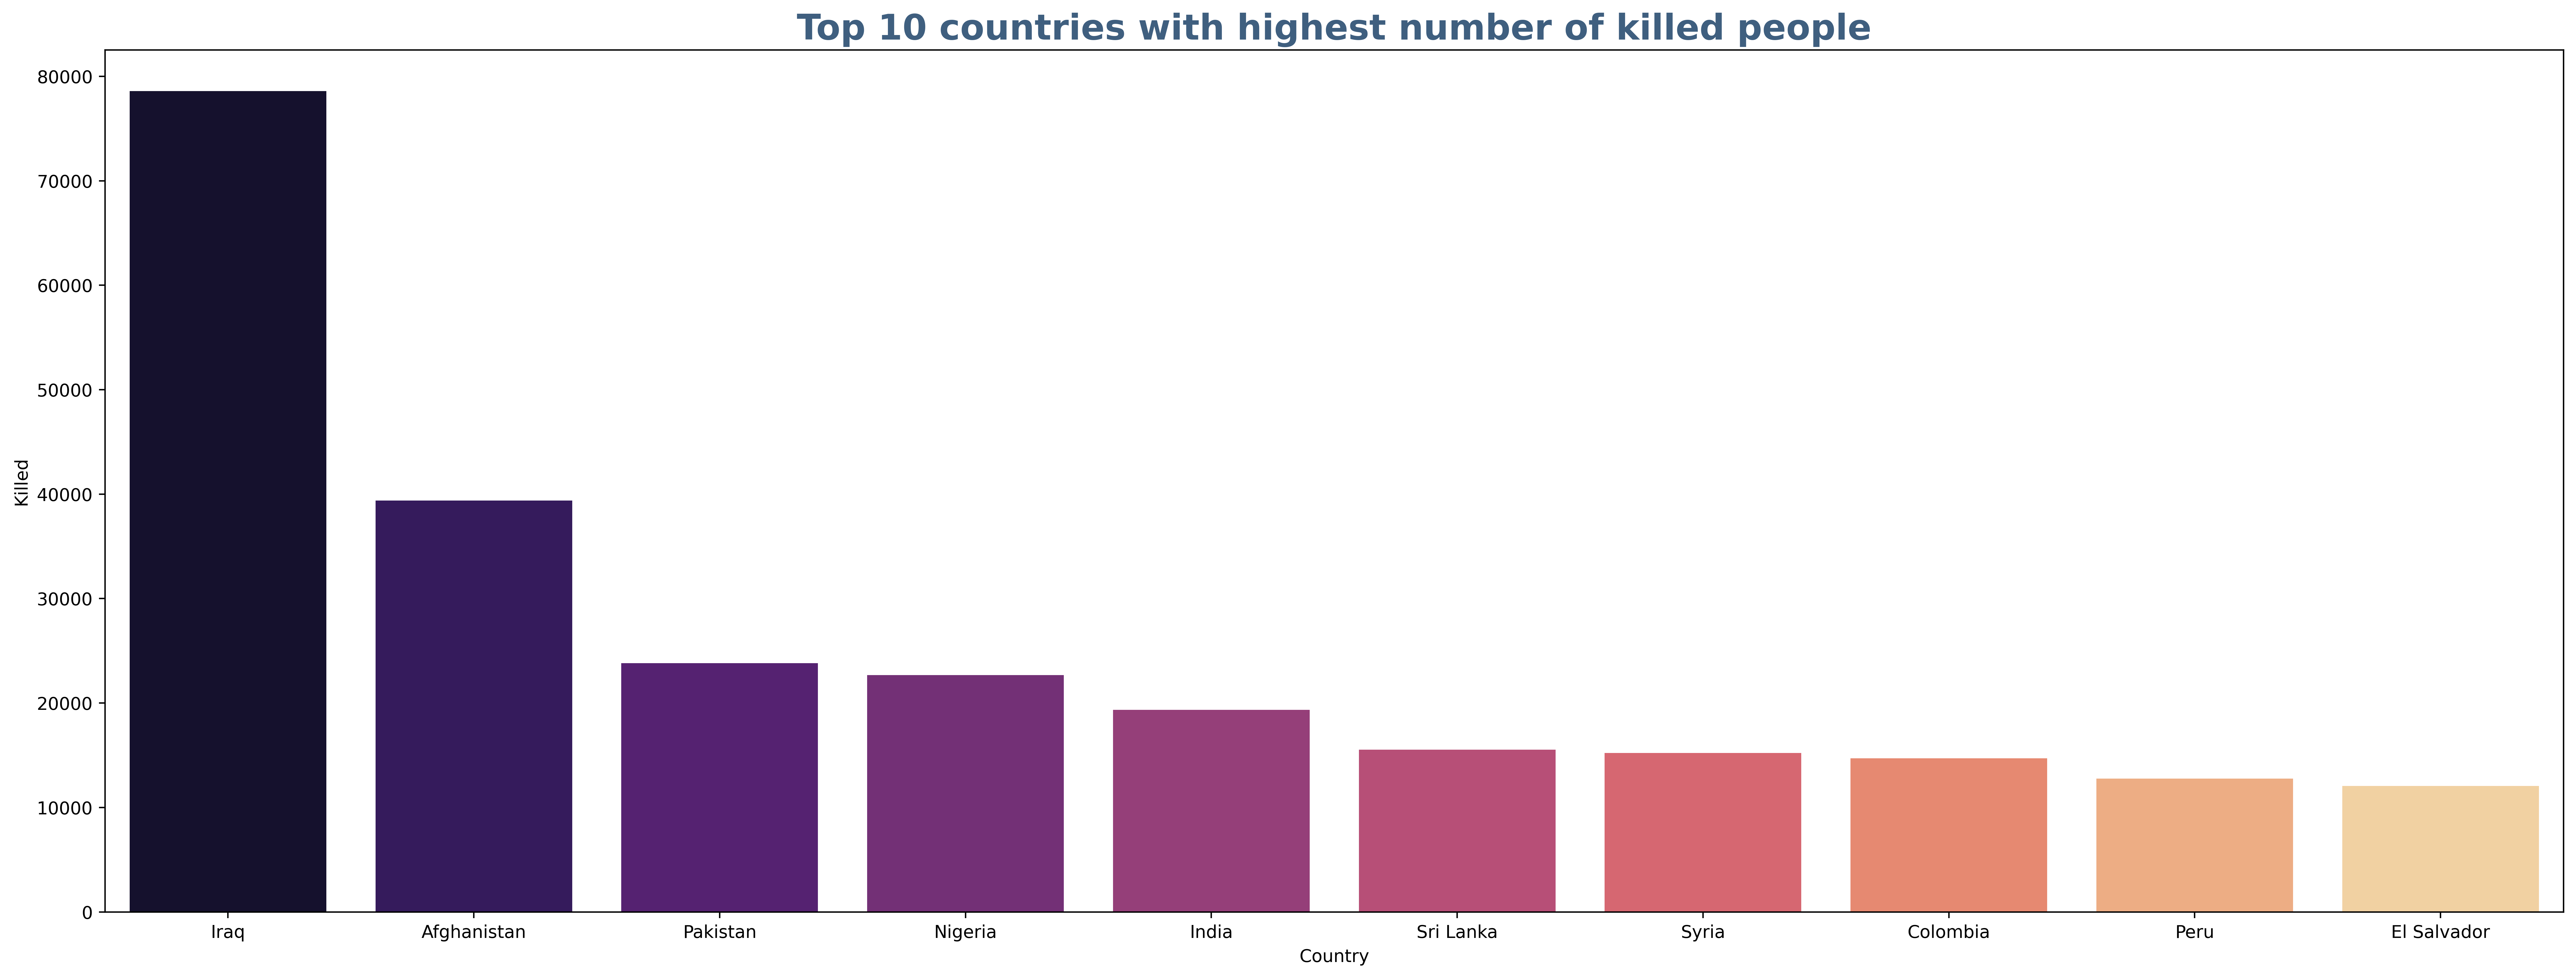

In [19]:
plt.figure(figsize=(25,9),dpi=500)
sns.barplot(x=most_killed['Country'],y=most_killed['Killed'],palette='magma')
plt.title("Top 10 countries with highest number of killed people",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])

In [20]:
country_attacks=df['Country'].value_counts()[:20].to_frame()
country_killed=df.groupby(['Country'])['Killed'].sum().sort_values(ascending=False).to_frame()
country_attacks=country_attacks.merge(country_killed, how = 'left' , left_index = True, right_index = True )
country_attacks

,Country,Killed
Iraq,24636,78589.0
Pakistan,14368,23822.0
Afghanistan,12731,39384.0
India,11960,19341.0
Colombia,8306,14698.0
Philippines,6908,9559.0
Peru,6096,12771.0
El Salvador,5320,12053.0
United Kingdom,5235,3410.0
Turkey,4292,6888.0


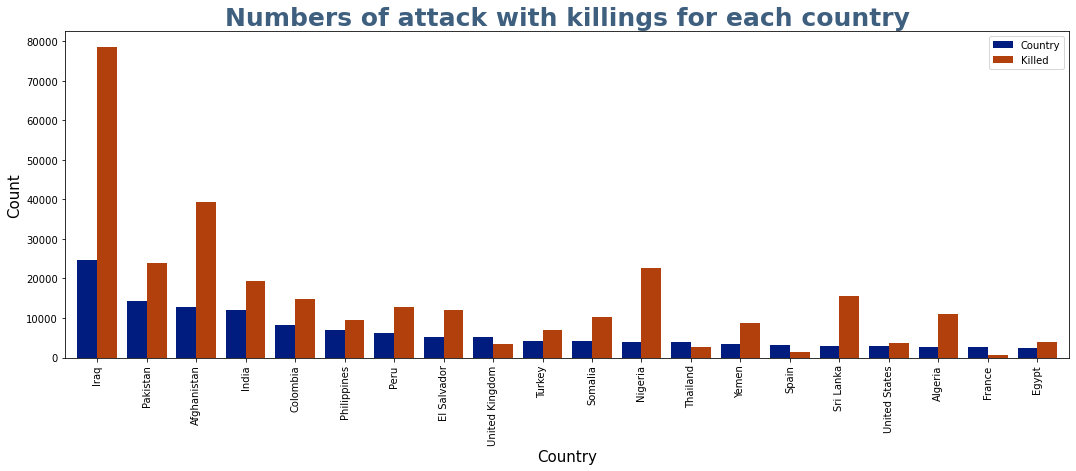

In [21]:
country_attacks.plot.bar(width = 0.8 , color = sns.color_palette('dark',2))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Numbers of attack with killings for each country",color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3],weight='bold',fontsize=25)
plt.ylabel("Count" ,fontsize = 15)
plt.xlabel("Country",fontsize = 15)
plt.show()

Lists the most countries affected by terrorism based on the total number of attacks. Another bar along with each countries’ attack count is the number of total victims killed in those attacks combined for that country.

Look at the bar of Iraq, it shows terrorist are very effective in getting what they wish for i.e destruction in terms of lives and same can be said for top 5 countries

There are countries like Philippines, Peru and the United Kingdom which has faced an almost similar number of attacks but have a different number of kills. The United Kingdom has suffered significantly fewer casualties compared to the other 2 countries
It also shows how Intelligence and Security agencies are not as efficient and vigilant w.r.t internal security of their countries

This also proves the above assumption that attacks generally happens in densely populated areas thus it will eventually claim many lives

The most safe country w.r.t this chart is France as the "attacks > kills"

#### Terrorist Activities in each region

In [22]:
rgn=df['Region'].value_counts().reset_index(name='counts')
rgn=rgn.rename(columns={'index':'region'})
rgn

,region,counts
0,Middle East & North Africa,50474
1,South Asia,44974
2,South America,18978
3,Sub-Saharan Africa,17550
4,Western Europe,16639
5,Southeast Asia,12485
6,Central America & Caribbean,10344
7,Eastern Europe,5144
8,North America,3456
9,East Asia,802


<ipython-input-23-1f6fe26054d9>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('Years',Weight='bold',fontsize=13)
<ipython-input-23-1f6fe26054d9>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('Numbers of attacks',Weight='bold',fontsize=13)


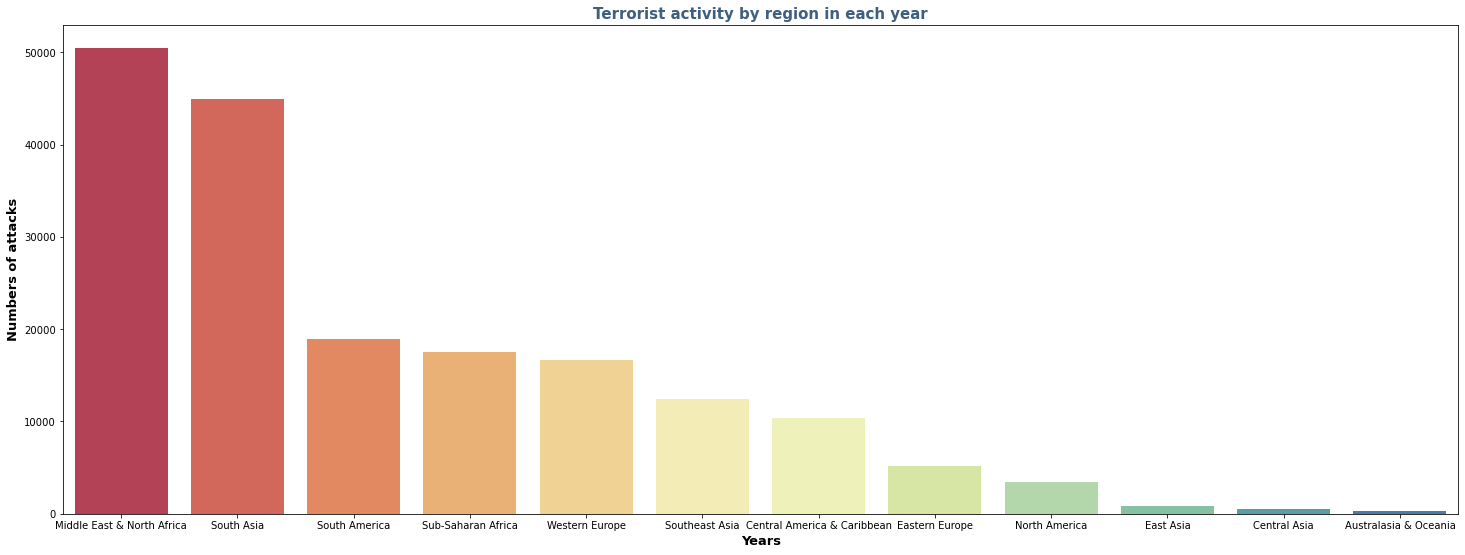

In [23]:
plt.figure(figsize=(25,9))
sns.barplot(x='region',y='counts',data=rgn,palette='Spectral')
plt.title('Terrorist activity by region in each year',fontsize=15,weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.xlabel('Years',Weight='bold',fontsize=13)
plt.ylabel('Numbers of attacks',Weight='bold',fontsize=13)
plt.show()

**Inference**- ***Regions Middle East and North Africa followed by South Asia are more prone to terrorist acttacks, and Australia & Oceania has least number of attacks.** 

**As South Asia Region is second most affected region,Lets choose India from South Asia to see the various factors involved in Terrorist Attacks***m

### Active Terrorist Groups

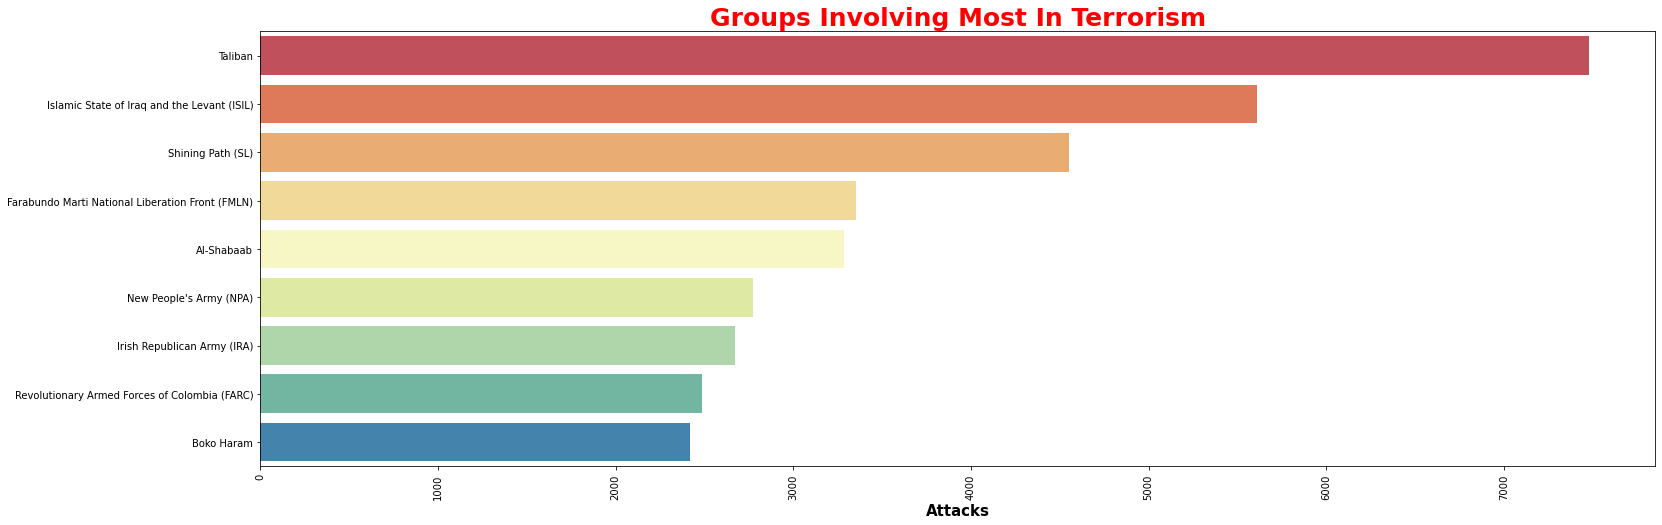

In [24]:
active_grp=df['Group'].value_counts()[:10]
active_grp.drop('Unknown',inplace=True)


plt.figure(figsize=(25,8))
sns.barplot(x=active_grp.values,y=active_grp.index,palette='Spectral')
plt.title('Groups Involving Most In Terrorism',weight='bold',fontsize=25,color='red')
plt.xlabel('Attacks',weight='bold',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

### active terrorist group killed most people

In [25]:
grp_kill=df[['Killed','Group']].groupby('Group').sum().sort_values(by='Killed',ascending=False).reset_index()[1:15]
grp_kill

,Group,Killed
1,Islamic State of Iraq and the Levant (ISIL),38923.0
2,Taliban,29410.0
3,Boko Haram,20328.0
4,Shining Path (SL),11601.0
5,Liberation Tigers of Tamil Eelam (LTTE),10989.0
6,Al-Shabaab,9330.0
7,Farabundo Marti National Liberation Front (FMLN),8065.0
8,Nicaraguan Democratic Force (FDN),6662.0
9,Tehrik-i-Taliban Pakistan (TTP),6042.0
10,Revolutionary Armed Forces of Colombia (FARC),5661.0


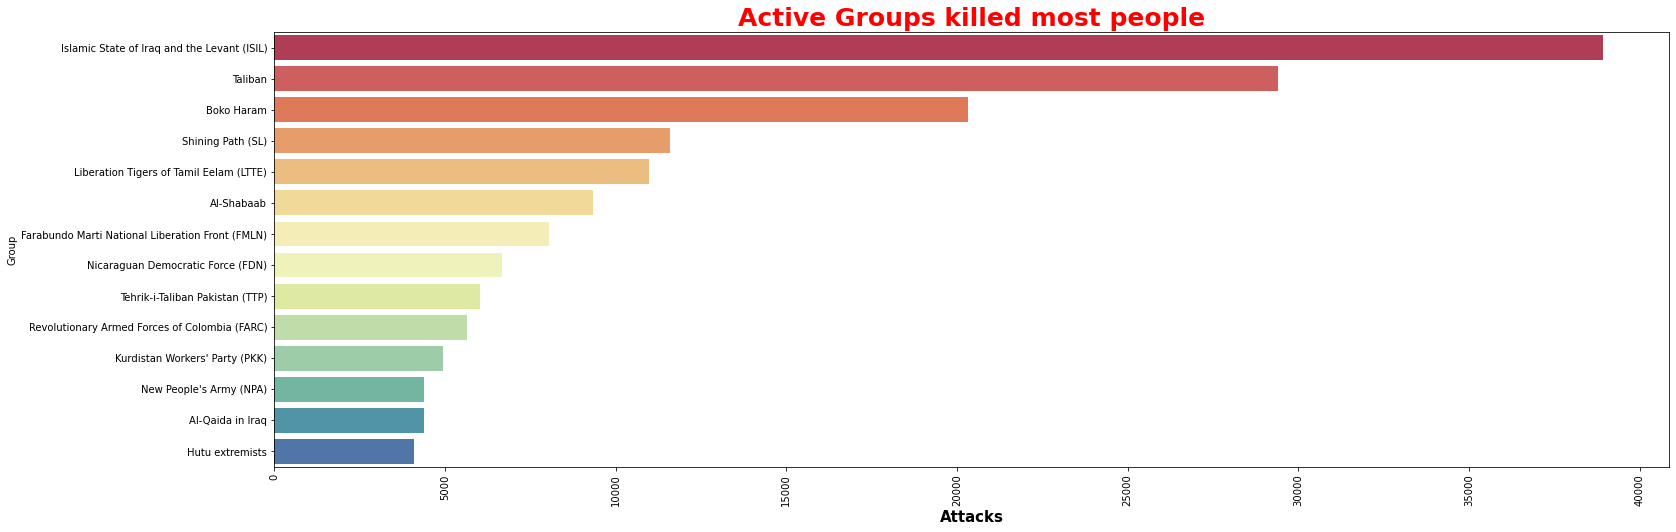

In [26]:
plt.figure(figsize=(25,8))
sns.barplot(x=grp_kill.Killed,y=grp_kill.Group,palette='Spectral')
plt.title('Active Groups killed most people',weight='bold',fontsize=25,color='red')
plt.xlabel('Attacks',weight='bold',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

###### Islamic State of Iraq and the Levant (ISIL) killed most people. and Taliban also killed most people after ISIL

**Analysis of attack types**

In [27]:
df['AttackType'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

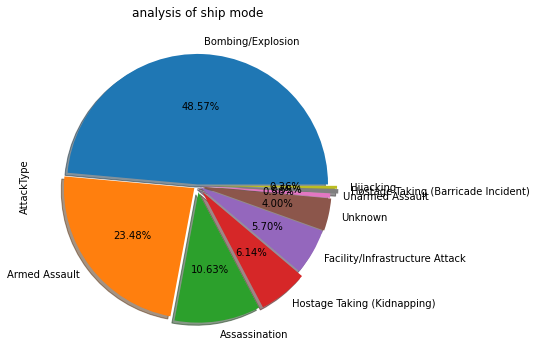

In [28]:
df['AttackType'].value_counts().plot(kind='pie',autopct='%1.2f%%',shadow=0.5,explode=[0.01,0.03,0.05,0.06,0.02,0.03,0.02,0.08,0.07],figsize=(15,6))
plt.title('analysis of ship mode')
plt.show()

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


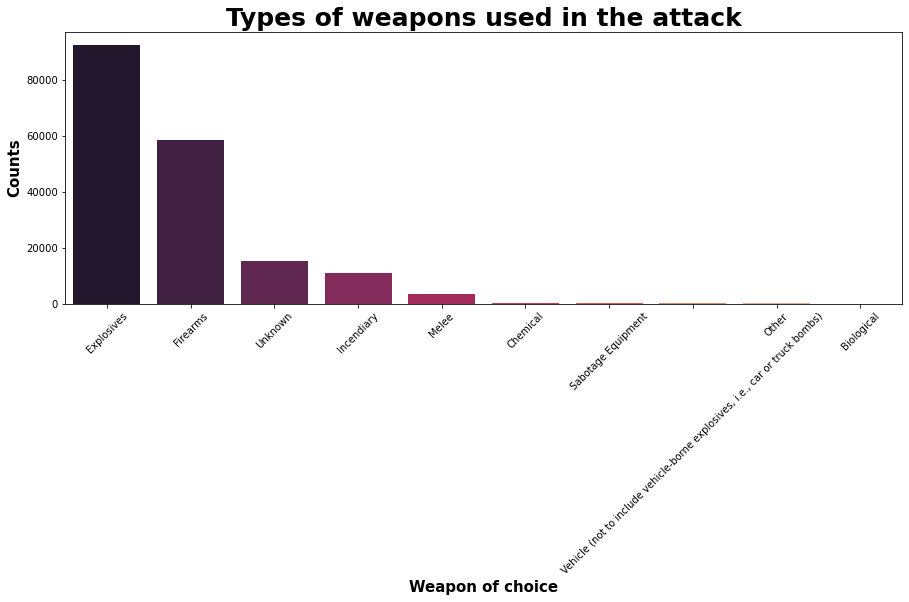

In [29]:
# Types of weapon used

plt.figure(figsize=(15, 5))
sns.barplot(
    df["Weapon_type"].value_counts()[:10].index,
    df["Weapon_type"].value_counts()[:10].values,
    palette=("rocket"),
)
plt.title("Types of weapons used in the attack",weight='bold',fontsize=25)
plt.xlabel("Weapon of choice",weight='bold',fontsize=15)
plt.ylabel("Counts",weight='bold',fontsize=15)
plt.xticks(rotation=45)
plt.show()

### Lets Analyze data for INDIA to see number of Attacks and casualities through year

In [30]:
df_india=df[df['Country']=='India']
df_india

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,casulties
1186,1972,2,22,India,Delhi,South Asia,New Delhi,28.585836,77.153336,Hijacking,B-747,0.0,0.0,NaN,Palestinians,Airports & Aircraft,Explosives,0.0
2764,1975,1,2,India,Bihar,South Asia,Samastipur,25.863042,85.781004,Bombing/Explosion,Lalit Narayan Mishra and a legislator,4.0,0.0,"1/2/1975: The Indian Railway Minister, Lalit N...",Ananda Marga,Government (General),Explosives,4.0
3857,1976,5,26,India,Delhi,South Asia,New Delhi,28.585836,77.153336,Bombing/Explosion,New Delhi airport,0.0,0.0,NaN,Unknown,Airports & Aircraft,Explosives,0.0
5327,1977,9,28,India,Maharashtra,South Asia,Bombay,19.075984,72.877656,Hijacking,DC-8,0.0,0.0,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,0.0
7337,1979,1,13,India,Assam,South Asia,Unknown,26.200605,92.937574,Armed Assault,patrol,NaN,NaN,NaN,Naga People,Police,Firearms,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181663,2017,12,30,India,Kerala,South Asia,Koothuparamba,11.831902,75.565432,Bombing/Explosion,Koothuparamba Police Station,0.0,0.0,12/30/2017: Assailants threw an explosive devi...,Unknown,Police,Explosives,0.0
181665,2017,12,30,India,Chhattisgarh,South Asia,Toylanka,18.802725,81.497666,Facility/Infrastructure Attack,Road Construction Site,0.0,0.0,12/30/2017: Assailants set fire to seven vehic...,Communist Party of India - Maoist (CPI-Maoist),Business,Firearms,0.0
181672,2017,12,31,India,Jammu and Kashmir,South Asia,Lethapora,33.966527,74.964225,Armed Assault,Camp,8.0,3.0,12/31/2017: Assailants armed with grenades and...,Jaish-e-Mohammad (JeM),Police,Explosives,11.0
181684,2017,12,31,India,Assam,South Asia,Hungrum,25.180162,93.015788,Hostage Taking (Kidnapping),Personal Security Officer of Council Member Ih...,0.0,0.0,12/31/2017: Assailants abducted Prafulla Phuka...,Zeliangrong United Front,Government (General),Firearms,0.0


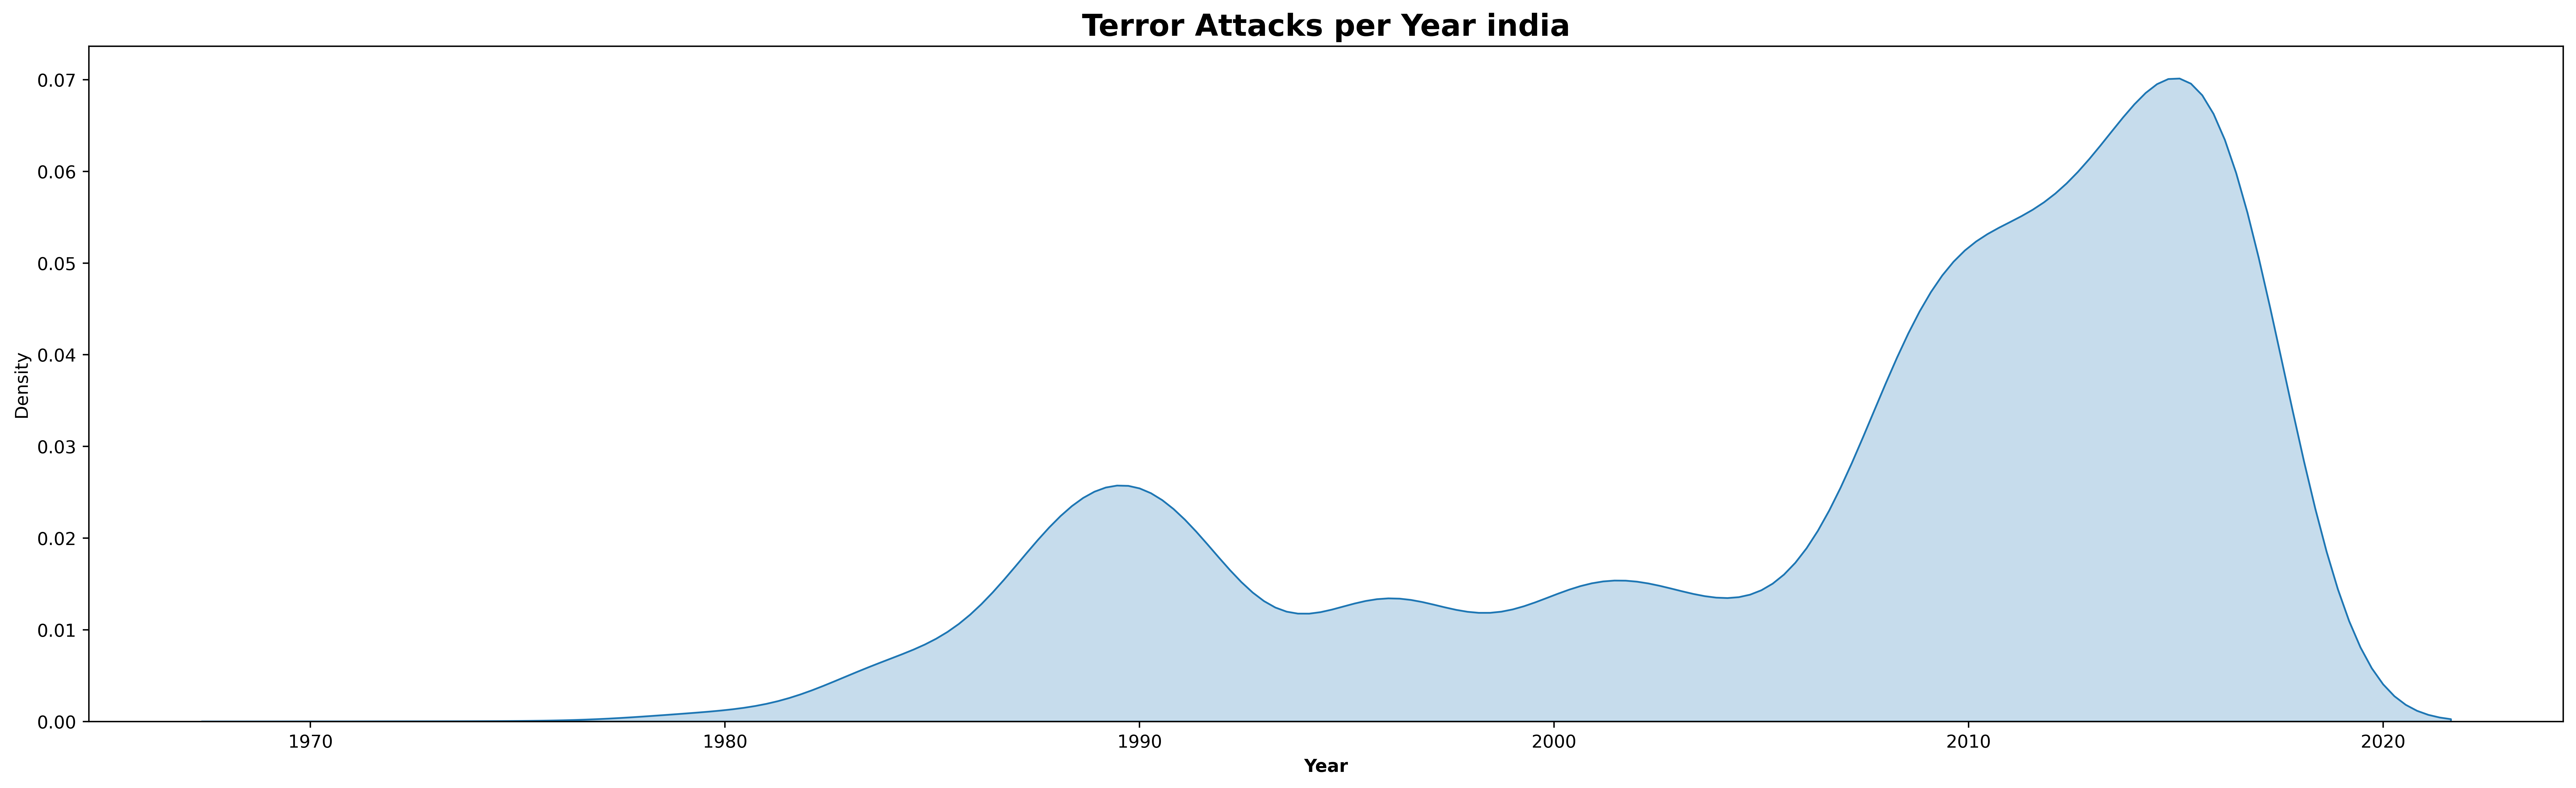

In [31]:
plt.figure(figsize=(25,7),dpi=500)
sns.kdeplot(x='Year',data=df_india,fill=True)
plt.xlabel('Year',fontweight='bold')
plt.title('Terror Attacks per Year india', fontweight='bold',fontsize=17);

In [32]:
affected_states=df_india[['casulties','state']].groupby('casulties').sum().sort_values('casulties',ascending=False).head(10)
affected_states=affected_states.reset_index() 
affected_states

,casulties,state
0,1005.0,Maharashtra
1,272.0,Assam
2,255.0,West Bengal
3,232.0,Tamil Nadu
4,210.0,Delhi
5,202.0,Maharashtra
6,170.0,Assam
7,144.0,Maharashtra
8,142.0,Uttaranchal
9,140.0,Andhra Pradesh


Text(0.5, 1.0, 'Top 10 state of india with highest number of Casualties people')

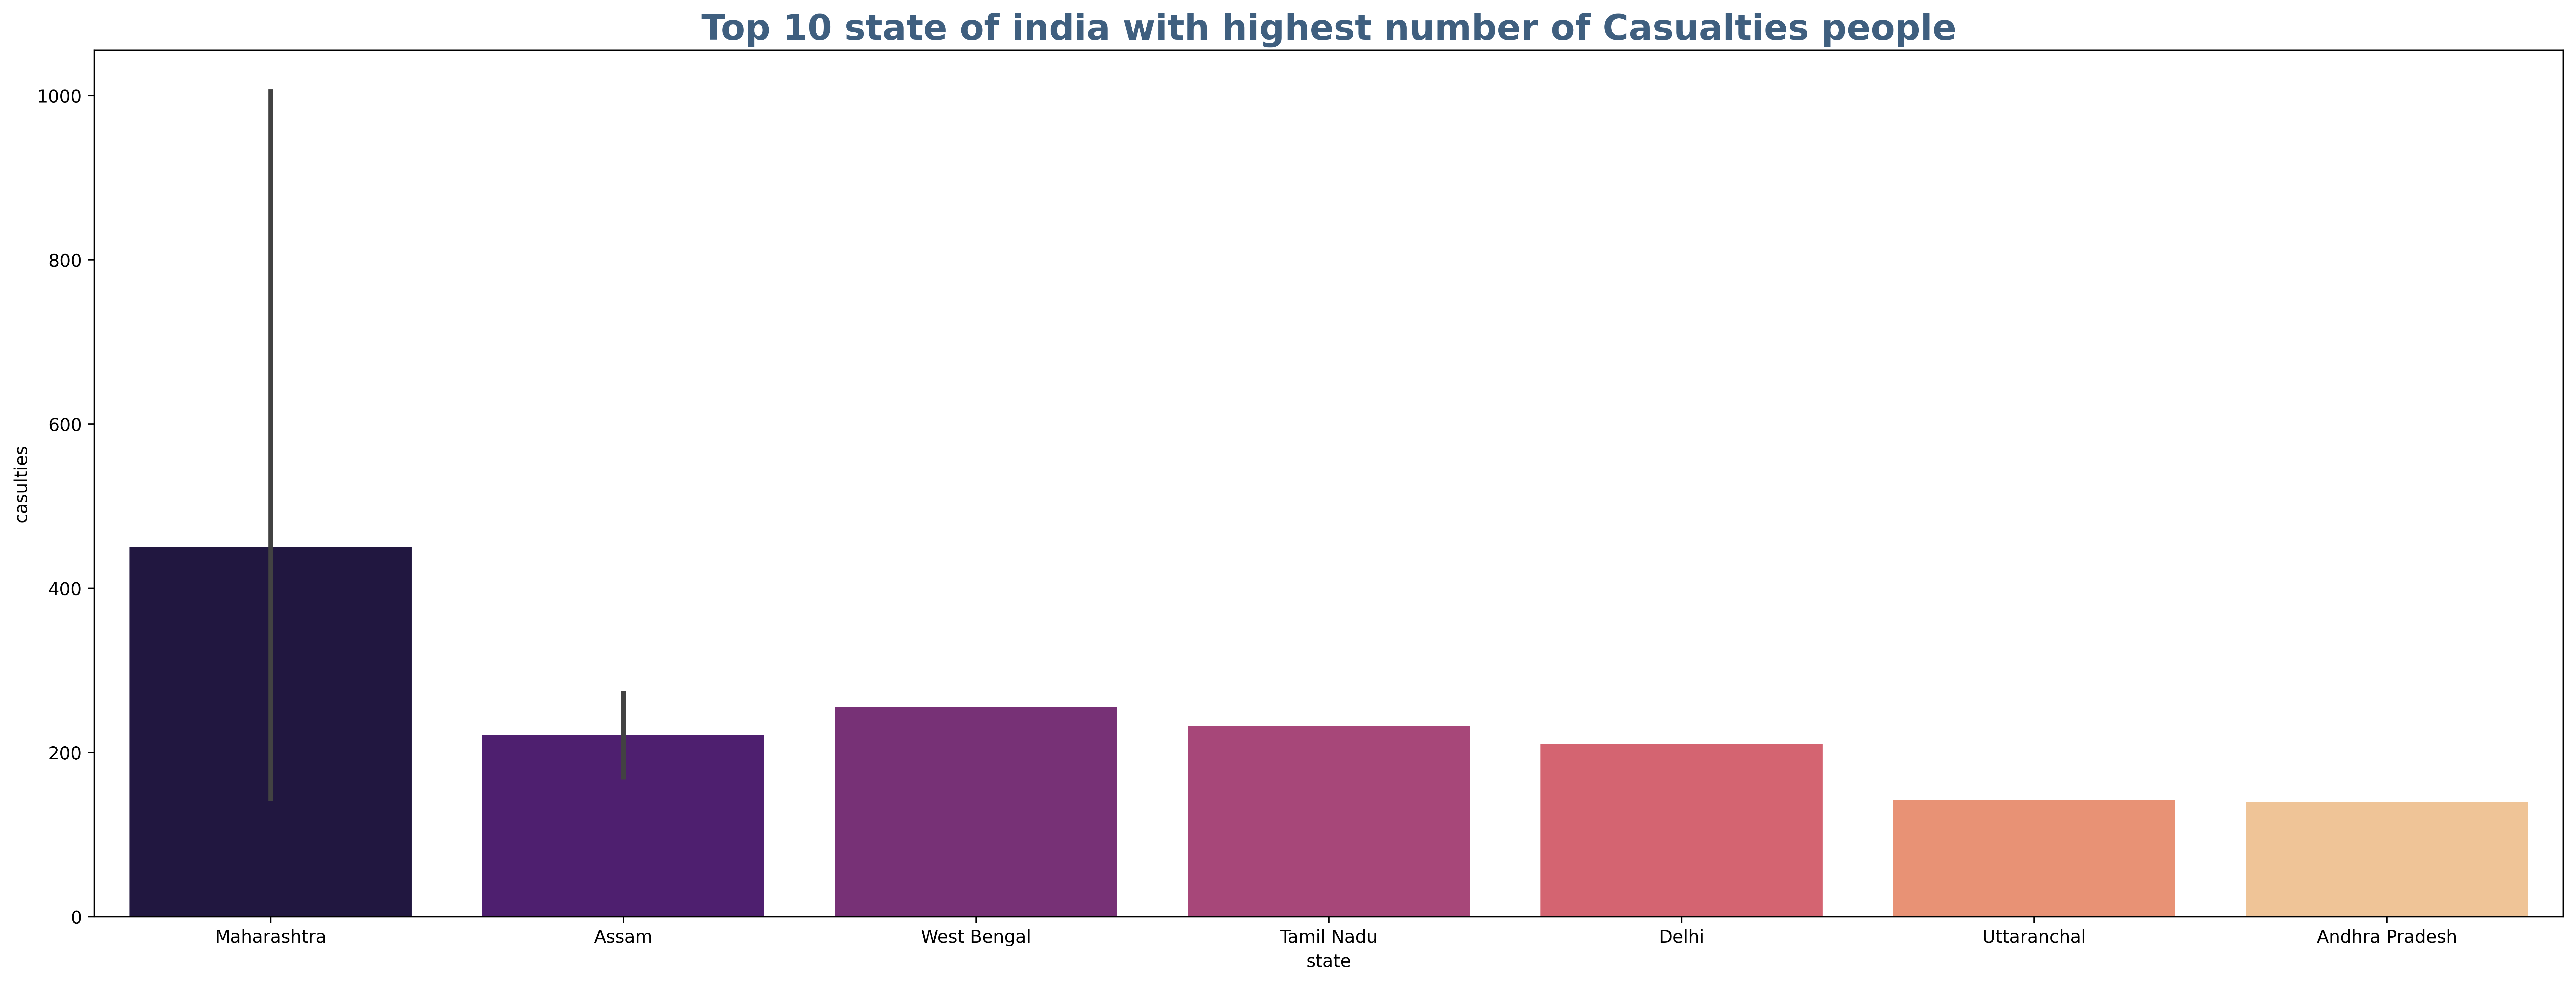

In [33]:
plt.figure(figsize=(25,9),dpi=500)
sns.barplot(x=affected_states['state'],y=affected_states['casulties'],palette='magma')
plt.title("Top 10 state of india with highest number of Casualties people",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])

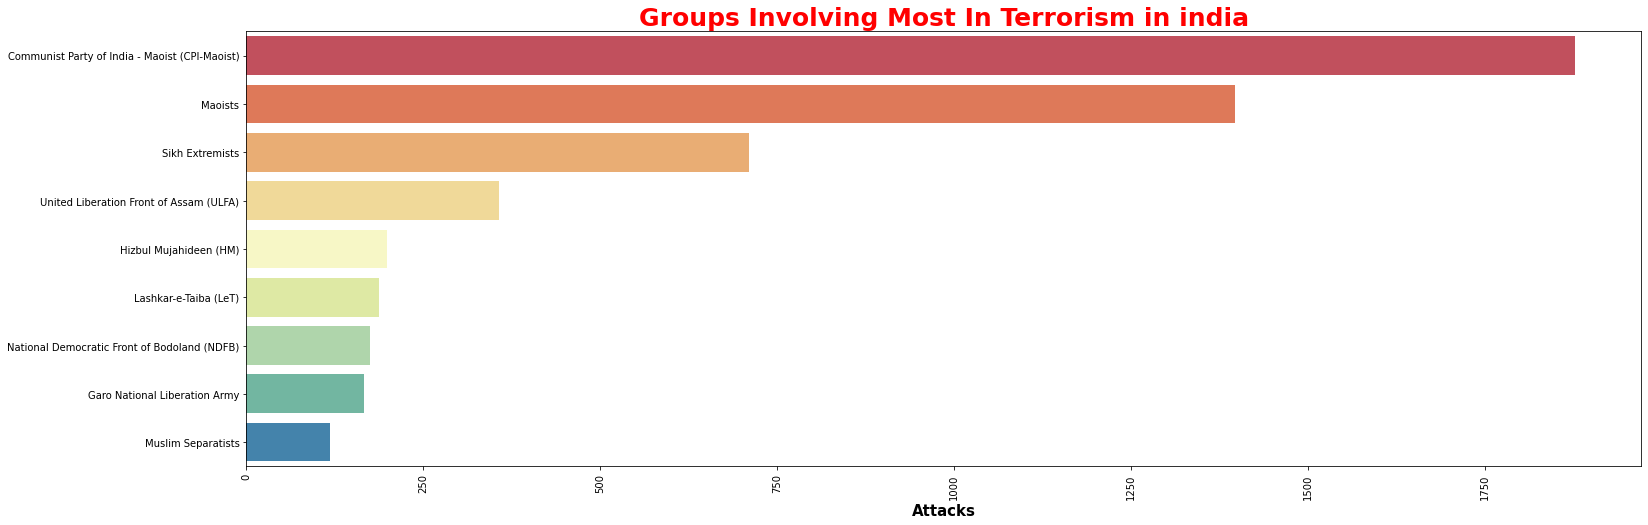

In [34]:
active_grp=df_india['Group'].value_counts()[:10]
active_grp.drop('Unknown',inplace=True)


plt.figure(figsize=(25,8))
sns.barplot(x=active_grp.values,y=active_grp.index,palette='Spectral')
plt.title('Groups Involving Most In Terrorism in india',weight='bold',fontsize=25,color='red')
plt.xlabel('Attacks',weight='bold',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

**group kill most people in india**

In [35]:
grp_kill=df_india[['Killed','Group']].groupby('Group').sum().sort_values(by='Killed',ascending=False).reset_index()[1:15]
grp_kill

,Group,Killed
1,Sikh Extremists,2477.0
2,Communist Party of India - Maoist (CPI-Maoist),2344.0
3,Lashkar-e-Taiba (LeT),969.0
4,Maoists,790.0
5,United Liberation Front of Assam (ULFA),617.0
6,National Democratic Front of Bodoland (NDFB),514.0
7,People's War Group (PWG),410.0
8,Hizbul Mujahideen (HM),409.0
9,Naxalites,408.0
10,Muslim Militants,377.0


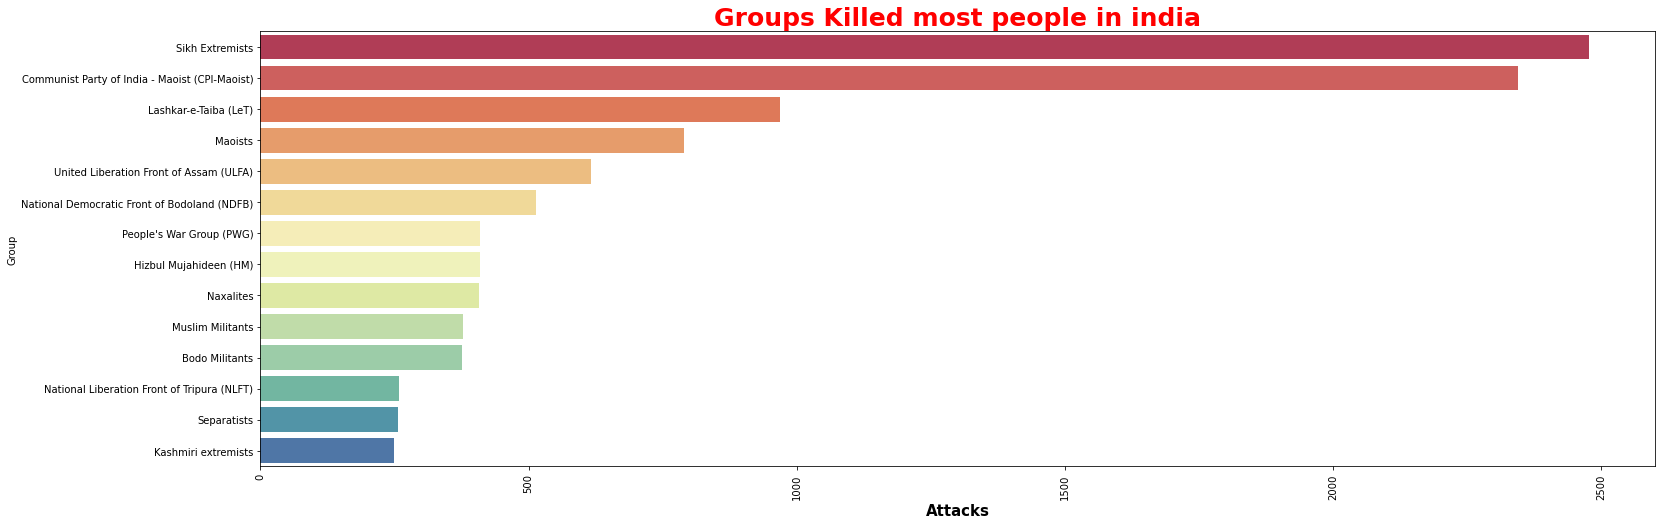

In [36]:

plt.figure(figsize=(25,8))
sns.barplot(x=grp_kill.Killed,y=grp_kill.Group,palette='Spectral')
plt.title('Groups Killed most people in india',weight='bold',fontsize=25,color='red')
plt.xlabel('Attacks',weight='bold',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

In [37]:
state=df_india.groupby(['state'])['state'].count().sort_values(ascending=False).reset_index(name='counts')
state

,state,counts
0,Jammu and Kashmir,2454
1,Assam,1151
2,Manipur,1100
3,Chhattisgarh,979
4,Punjab,949
5,Jharkhand,887
6,Bihar,688
7,West Bengal,650
8,Odisha,428
9,Maharashtra,302


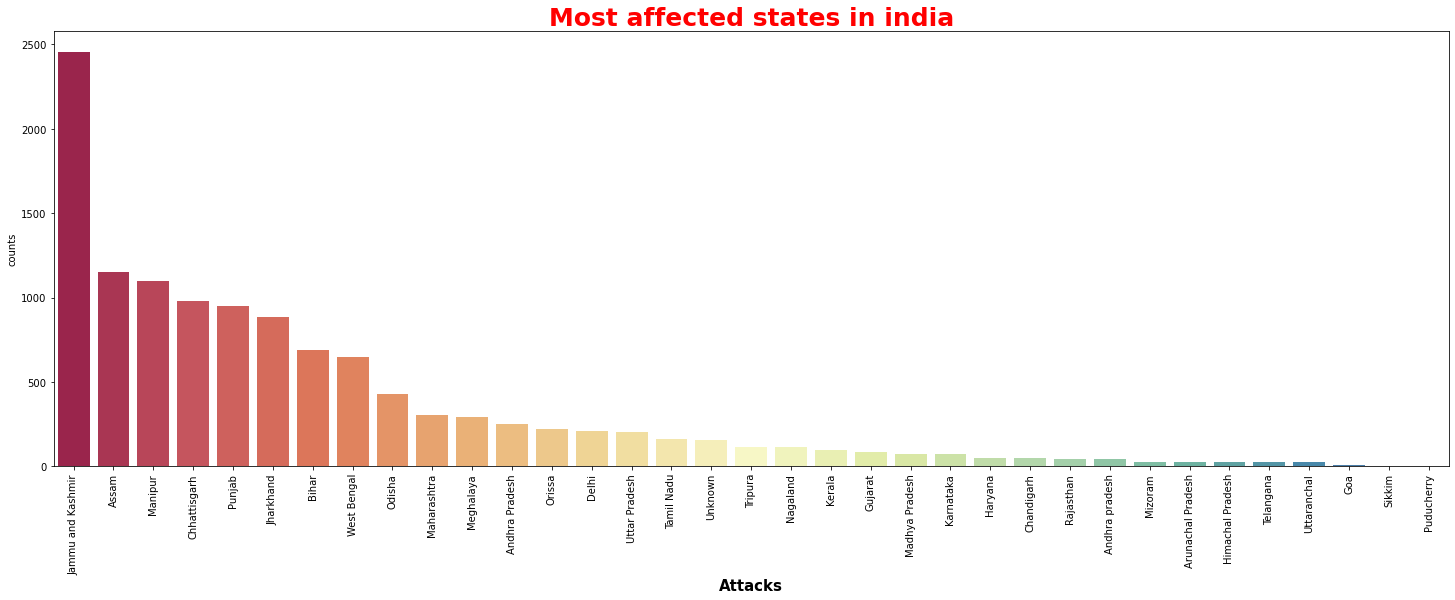

In [38]:
plt.figure(figsize=(25,8))
sns.barplot(x=state.state,y=state.counts,palette='Spectral')
plt.title('Most affected states in india',weight='bold',fontsize=25,color='red')
plt.xlabel('Attacks',weight='bold',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

### Lets Analyize various trends of the attacks on J&K-- most attacked state of india

In [39]:
J_K=df_india[df_india['state']=='Jammu and Kashmir']
J_K

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,casulties
21744,1984,4,17,India,Jammu and Kashmir,South Asia,Bhela,33.315527,74.622476,Assassination,Gurbachan Singh Sandhar (Sikh lawyer) and wife,2.0,0.0,NaN,Sikh Extremists,Private Citizens & Property,Unknown,2.0
22108,1984,5,20,India,Jammu and Kashmir,South Asia,Jammu,32.726602,74.857026,Bombing/Explosion,bridge over a stream,1.0,0.0,NaN,Unknown,Transportation,Explosives,1.0
29677,1986,12,11,India,Jammu and Kashmir,South Asia,Madora,33.934929,75.154160,Bombing/Explosion,general post office complex,1.0,5.0,NaN,Unknown,Government (General),Unknown,6.0
33202,1988,1,21,India,Jammu and Kashmir,South Asia,Mand,32.888165,74.985168,Armed Assault,police unit,2.0,0.0,NaN,Unknown,Police,Firearms,2.0
33372,1988,2,7,India,Jammu and Kashmir,South Asia,Kherawali,32.523889,74.974444,Armed Assault,marriage reception,4.0,5.0,NaN,Sikh Extremists,Private Citizens & Property,Firearms,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181222,2017,12,11,India,Jammu and Kashmir,South Asia,Kralcheck Keller,33.732981,74.855559,Armed Assault,Van,2.0,1.0,12/11/2017: Assailants opened fire on a Jammu ...,Jaish-e-Mohammad (JeM),Business,Firearms,3.0
181396,2017,12,18,India,Jammu and Kashmir,South Asia,Baramulla district,34.191218,74.350010,Bombing/Explosion,Police Station,0.0,0.0,12/18/2017: Assailants threw a grenade at a po...,Unknown,Police,Explosives,0.0
181414,2017,12,19,India,Jammu and Kashmir,South Asia,Pulwama district,33.873538,74.899019,Bombing/Explosion,Police Line,0.0,0.0,12/19/2017: Assailants fired a rifle grenade a...,Unknown,Police,Explosives,0.0
181476,2017,12,22,India,Jammu and Kashmir,South Asia,Srinagar,34.083740,74.789902,Armed Assault,Post,0.0,0.0,12/22/2017: Assailants threw two petrol bombs ...,Unknown,Police,Incendiary,0.0


### most affected city in k and k

In [40]:
jk=J_K.groupby(['city'])['city'].count().sort_values(ascending=False).reset_index(name='counts')[:10]
jk

,city,counts
0,Srinagar,657
1,Sopore,102
2,Unknown,86
3,Anantnag,76
4,Jammu,57
5,Pulwama,42
6,Shopian,39
7,Tral,35
8,Bijbehara,34
9,Baramulla,33


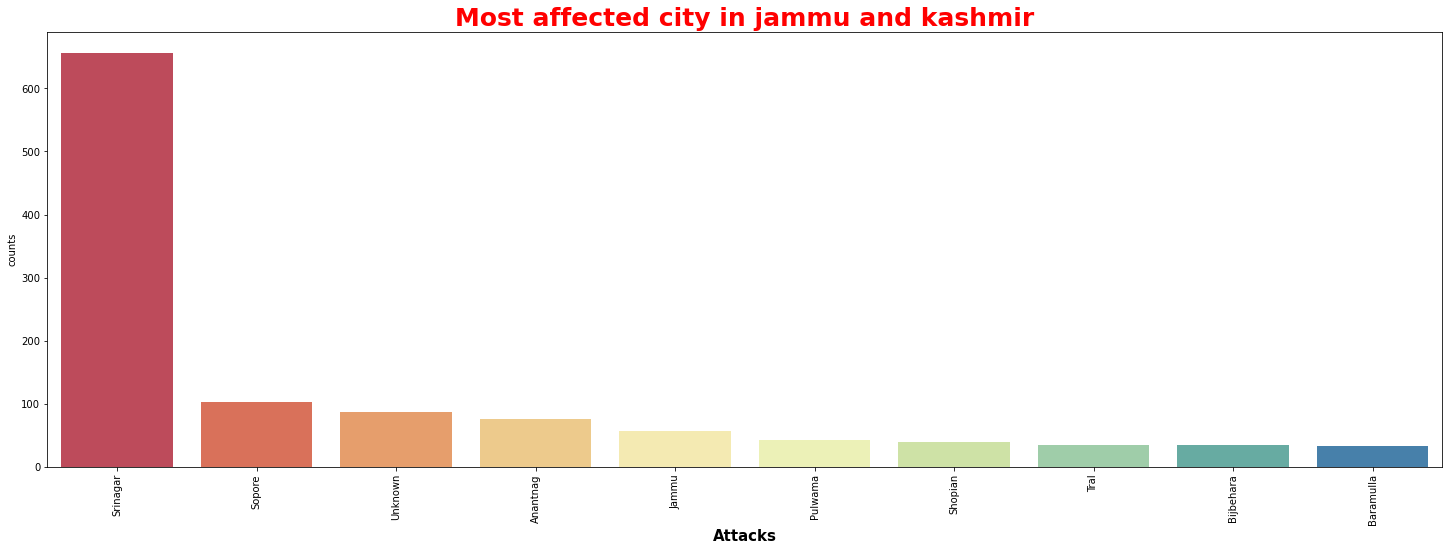

In [41]:
plt.figure(figsize=(25,8))
sns.barplot(x=jk.city,y=jk.counts,palette='Spectral')
plt.title('Most affected city in jammu and kashmir',weight='bold',fontsize=25,color='red')
plt.xlabel('Attacks',weight='bold',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

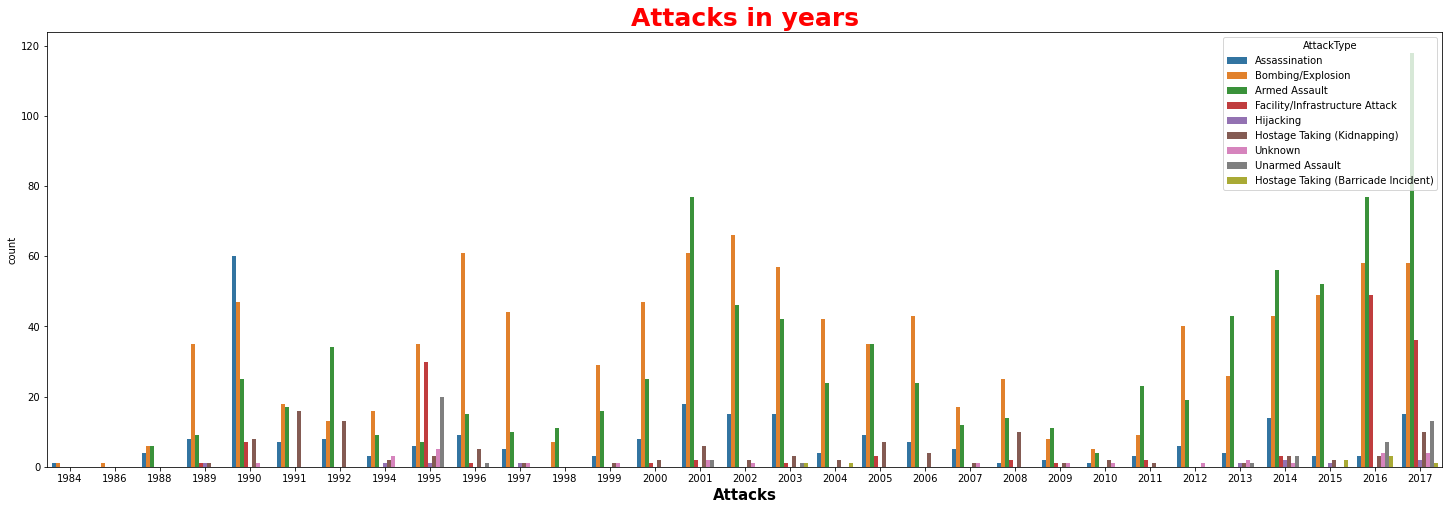

In [42]:
plt.figure(figsize=(25,8))
sns.countplot(x='Year',data=J_K,hue='AttackType')
plt.title('Attacks in years',weight='bold',fontsize=25,color='red')
plt.xlabel('Attacks',weight='bold',fontsize=15)
# plt.xticks(rotation= 90)
plt.show()

In [43]:
targeted=J_K.groupby(['Target','AttackType'])['casulties'].count().sort_values(ascending=False).reset_index()[:10]
targeted

,Target,AttackType,casulties
0,Unknown,Bombing/Explosion,70
1,Patrol,Armed Assault,61
2,Unit,Armed Assault,41
3,Police Station,Bombing/Explosion,23
4,Convoy,Armed Assault,23
5,Patrol,Bombing/Explosion,20
6,Building,Facility/Infrastructure Attack,20
7,Officers,Armed Assault,20
8,Camp,Armed Assault,19
9,Officers,Bombing/Explosion,17


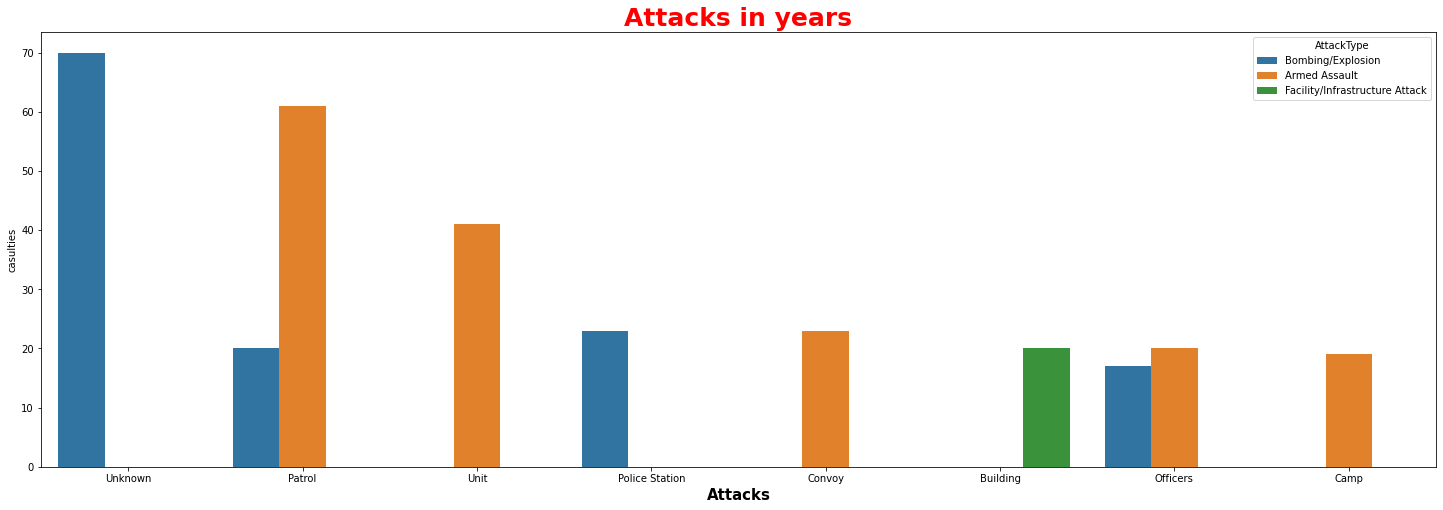

In [44]:
# Using custom funtion to create Scatter plot for 'Casultie' and killed
plt.figure(figsize=(25,8))
sns.barplot(x='Target',y='casulties',data=targeted,hue='AttackType')
plt.title('Attacks in years',weight='bold',fontsize=25,color='red')
plt.xlabel('Attacks',weight='bold',fontsize=15)
# plt.xticks(rotation= 90)
plt.show()

### Lets see in which Month most number of attacks Happend

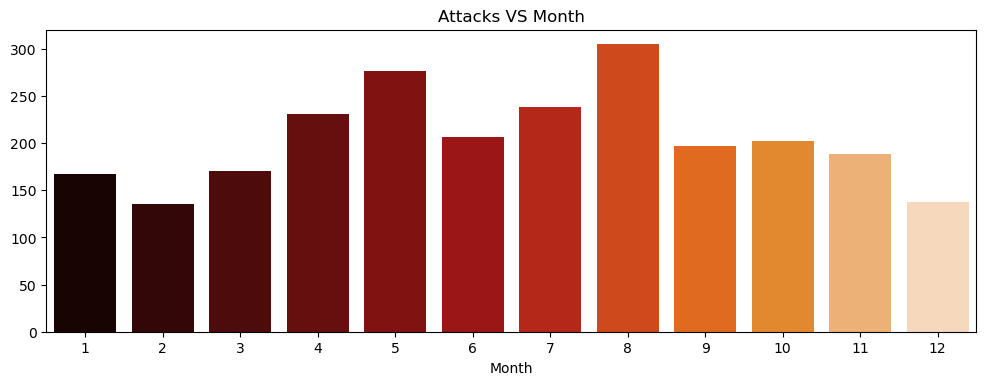

In [45]:
#Plotting the Values
plt.figure(figsize=(12,4),dpi=100)
sns.barplot(x=J_K.groupby('Month')['Month'].count().sort_values(ascending=False).index,y=J_K.groupby('Month')['Month'].count().sort_values(ascending=False).values,palette='gist_heat')
plt.title('Attacks VS Month');

### Conclusion:

After the Year 2003-04 there is sharp increase in the terror attacks throughout the globe.

Year 2014 is where most attack happpen considered the most most violent year for the world in terms of terror attacks.

89% of attacks are successfull as per data.

United States faced most number of Casualities(Killed+ Bounded) in the world.

Iraq is a country where most number of terrorist attack happen

Middle East and North Africa is a region where most number of terrorist attack happen, follwed by South Asia where second most number of terrorist attack happen

Autralia & Oceania is the least prone to terrorist Attacks.

After the year 2008, India sees a sharp increase of terrorist attacks ---and 2016 is most violent year for india in terms of terror attacks.

Majority of terror attacks in india are of the kind Bombing/Explosion

J&K is a state where most number of terrorist attack happen in india followed by Assam and Manipur-----

Puducherry is a state where least number of attack happend considered to be safest in terms of terror attacks.

Most number of fatalities happen in armed assault and most number of injuries happen in Bombing/Explosion in J&K

Police is most targeted when terrorist do Bombing/Explosion and Armed Assault

Most number of attacks happen in the month of August in J&K

Most Active Terrorist group is Hizbul Mujahideen.